In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
from inputdatabuilder import InputDataBuilder
from hopfieldnetwork import HopfieldNetwork
%aimport hopfieldnetwork # force reload if changed
import utils

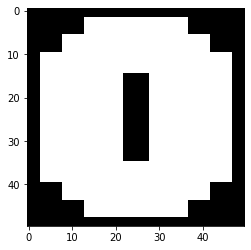

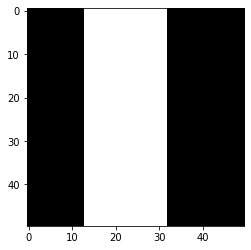

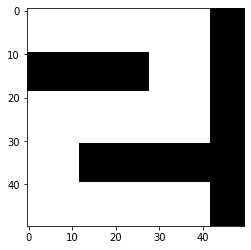

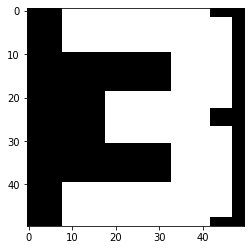

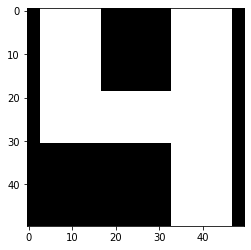

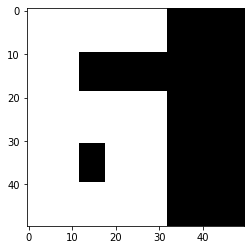

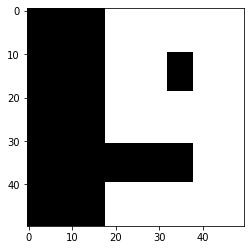

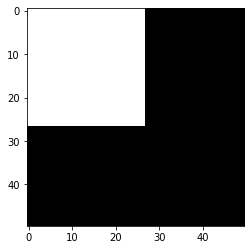

In [99]:
path = "data/digits"
names = os.listdir(path)
fpaths = ["{}/{}".format(path, name) for name in names]
idb = InputDataBuilder(fpaths, size=(50,50))

for img in idb.deserialize(display=True):
    plt.imshow(Image.fromarray(img), cmap='gray')
    plt.show()


In [101]:
hn = HopfieldNetwork(n=np.prod(idb.size))
X = idb.X
for x in X:
    x[x == 0] = -1

hn.batch_update(X, strengths=[1,1,1,1,5,1,1,1])

0.0Lossy conversion from int32 to uint8. Range [-1, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Hit MSE goal after 2 iterations


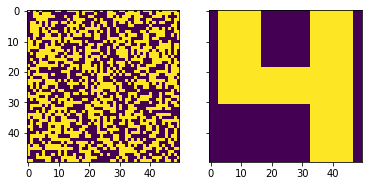

In [103]:
# create random image
random_image = utils.create_random_array(hn.n, 0.5)

# recall, should get strongest out
x_recalled = hn.recall(random_image, tol=1e-05, verbose=True, save_evolution=idb.size[0])
x_recalled = x_recalled.astype(np.float64)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(random_image.reshape(idb.size))
ax2.imshow(x_recalled.reshape(idb.size))
plt.show()

In [105]:
# retrain with no strength
hn = HopfieldNetwork(n=np.prod(idb.size))
X = idb.X
for x in X:
    x[x == 0] = -1

hn.batch_update(X)

Hit MSE goal after 1 iterations


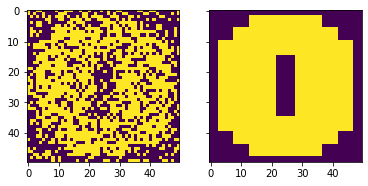

Hit MSE goal after 1 iterations


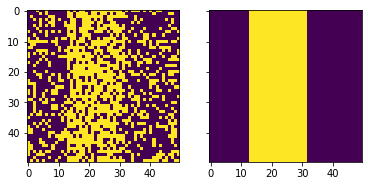

Hit MSE goal after 1 iterations


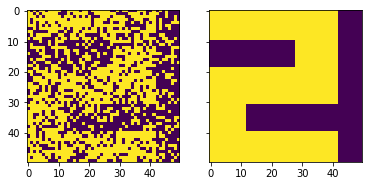

Hit MSE goal after 2 iterations


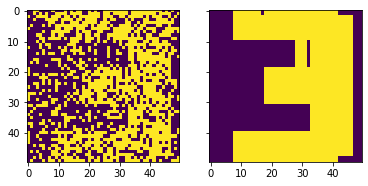

Hit MSE goal after 1 iterations


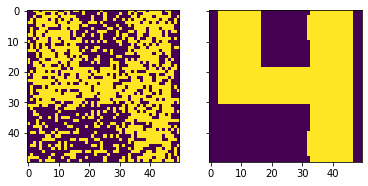

Hit MSE goal after 1 iterations


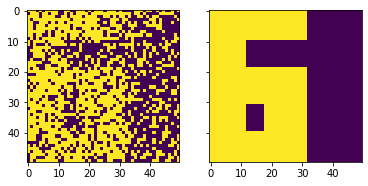

Hit MSE goal after 1 iterations


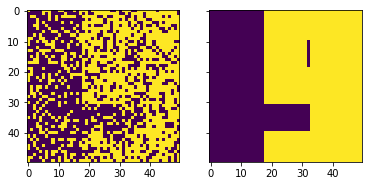

Hit MSE goal after 2 iterations


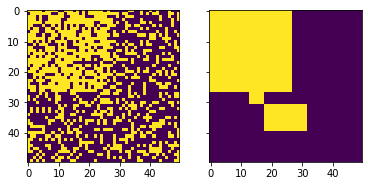

In [106]:
# recall all. Works best when all strengths are the same 
noisy_imgs = idb.get_salt_pepper_noisy_imgs(p_flip=0.3)
for i,img in enumerate(noisy_imgs):
    x_noisy = img.flatten()
    x_noisy = x_noisy.astype('int8')
    x_noisy[x_noisy == 0] = -1
    # recall image
    x_recalled = hn.recall(x_noisy, tol=1e-05, verbose=True)
    x_recalled = x_recalled.astype(np.float64)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(x_noisy.reshape(idb.size))
    ax2.imshow(x_recalled.reshape(idb.size))
    plt.show()
    cv2.imwrite('noise_%s.png'%i, x_noisy.reshape(idb.size) * 255)
    cv2.imwrite('recalled_%s.png'%i, x_recalled.reshape(idb.size) * 255)